In [14]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
# Use white grid plot background from seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

Import the madera-county-roads layer - california/madera-county-roads/tl_2013_06039_roads.shp. Plot the roads.

In [20]:
roads = gpd.read_file('C:\capes_sql\colorado-flood\spatial-vector-lidar\california\madera-county-roads/tl_2013_06039_roads.shp')

In [28]:
roads

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110454239066,N 14th St,M,S1400,"LINESTRING (-120.27227 37.11615, -120.27244 37..."
1,110454239052,N 11th St,M,S1400,"LINESTRING (-120.26788 37.11667, -120.26807 37..."
2,110454239056,N 12th St,M,S1400,"LINESTRING (-120.27053 37.11749, -120.27045 37..."
3,110454239047,N 10th St,M,S1400,"LINESTRING (-120.26703 37.11735, -120.26721 37..."
4,110454243091,N Westberry Blvd,M,S1400,"LINESTRING (-120.10122 36.96524, -120.10123 36..."
...,...,...,...,...,...
9635,110454244324,Kings Canyon Ct N,M,S1400,"LINESTRING (-119.77493 37.18221, -119.77481 37..."
9636,110454242718,Gold Dust Ct N,M,S1400,"LINESTRING (-119.71746 37.23623, -119.71739 37..."
9637,110454243105,Whitworth Dr N,M,S1400,"LINESTRING (-120.08446 37.01512, -120.08440 37..."
9638,110454241750,Cascadel Dr N,M,S1400,"LINESTRING (-119.45740 37.22955, -119.45721 37..."


In [17]:
roads.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

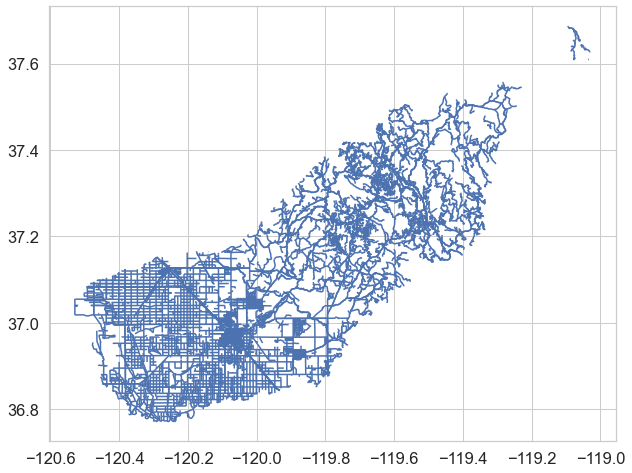

In [27]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

roads.plot(ax=ax)


plt.show()

In [21]:
centroids = gpd.read_file('C:/capes_sql/colorado-flood/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')
crops = gpd.read_file('C:/capes_sql/colorado-flood/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')

In [23]:
centroids.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
crops.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Reproject

In [25]:
# reproject roads to crops crs
roads_reproj = roads.to_crs(crops.crs)

In [26]:
roads_reproj.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
centroids

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)
6,SJER192,center,4111071.087,256683.434,grass,POINT (256683.434 4111071.087)
7,SJER272,center,4112167.778,256717.467,trees,POINT (256717.467 4112167.778)
8,SJER2796,center,4111533.879,256034.390,soil,POINT (256034.390 4111533.879)
9,SJER3239,center,4109856.983,258497.102,soil,POINT (258497.102 4109856.983)


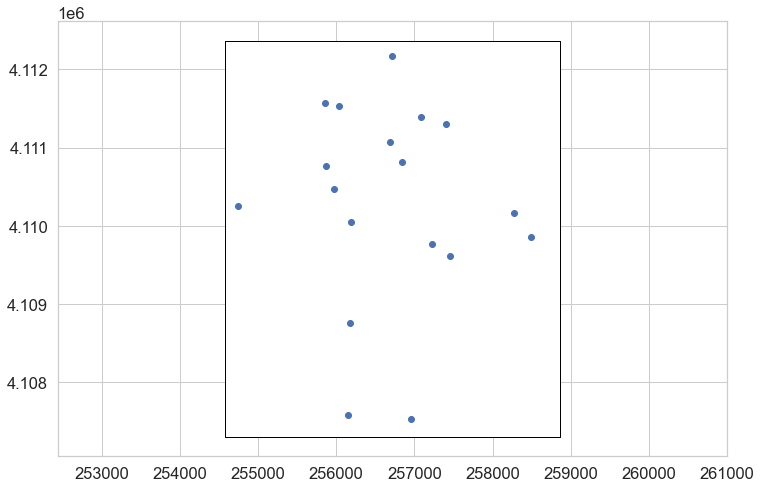

In [35]:
# Plot the data by attribute
fig, ax = plt.subplots(figsize=(12, 8))

crops.plot(alpha=1, 
         color="white", 
         edgecolor="black", 
         ax=ax)



centroids.plot(ax=ax)
#ax.set_axis_off()
plt.axis('equal')
plt.show()

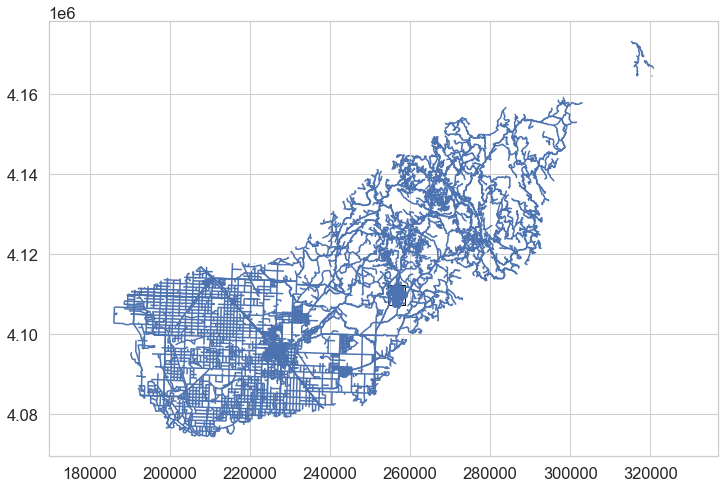

In [37]:
# Plot the data by attribute
fig, ax = plt.subplots(figsize=(12, 8))

roads_reproj.plot(ax=ax)

crops.plot(alpha=1, 
         color="white", 
         edgecolor="black", 
         ax=ax)



centroids.plot(ax=ax)
#ax.set_axis_off()
plt.axis('equal')
plt.show()